# Cleaning and Analysis of dataset

## I. Cleaning the Data

### I. Data Cleaning

In [792]:
import pandas as pd 
import numpy as np 
import re
import nltk
import matplotlib.pyplot as plt
import collections
from wordcloud import WordCloud,STOPWORDS

In [793]:
df_orig = pd.read_csv("../Data/resume_dataset.csv")
df = df_orig.copy(deep = True)

#### We see that the resumes provided in the data by default are highty unsuitable for use in our further analysis and modelling. Hence, rigourous cleaning would be necessary.<br>

* In many resumes, phone numbers, email ids, address etc has been censored(replaced by a string of 'x') for privacy reasons. Eg: email:xxxx.xxxx@xxxx.xxxx . This would add unecessary noise to the dataset as it adds no value whatsoever.
* The Resumes are in byte strings encoded in utf-8 format. They seem to include many utf specific character codes, which aren't interpretable in ascii and can add a lot of noise in assessing the resumes too.
* A lot of resumes had separators like '--------------', which had to removed too.
* **Punctuation** and **stopwords** didnt seem to add any value to the analysis, and hence it was decided to be gotten rid of.
* There were also some records with highly errouneous formatting which came in the way of our cleaning/analysis. Getting rid of them was the best resort.
* Details like email id, phone numbers, dates etc would add nothing but plain noise to the analysis which would add merely any value in the process of classification.It was hence considered best to remove them. 

#### Added to all this, the formatting in the resumes are not uniform. The dataset is devoid of a template that the resumes can adhere to. Hence this could make extraction of information for further tasks a tad challeging.<br>
**The column consisting of the original Resumes is retained for compasion and reference.**

In [794]:
length = df["Resume"].shape
length

(1219,)

In [795]:
df["res_new"] = df["Resume"]
eval_res = df["res_new"].copy(deep=True)

In [796]:
import string
def rem_punc(s):
    punc = string.punctuation
    return [i for i in s if i not in punc]

def rem_sw(s):
    sw = set(STOPWORDS)
    return [i for i in s if i not in sw]

In [797]:
#eval_res = Resumes
j=0
i=0
l=[]
for i in range(length[0]):
    try:
        eval_res[i] = eval(eval_res[i]).decode()
    except:
        l.append(i)
        pass

In [798]:
eval_res.shape

(1219,)

In [799]:
df["res_new"] = eval_res
df = df.drop(l,axis=0)
#print(df[30:40])
df = df.reset_index(drop = True)

In [800]:
df.shape

(1212, 4)

** Records with missing data ie. resumes must be dealt with. We simply delete these columns as imputation would simply not make any sense. **

In [801]:
df = df[["ID","Category","res_new","Resume"]]
df['res_new'].replace('', np.nan, inplace=True)
df.dropna(subset=['res_new'], inplace=True)
df = df.reset_index(drop = True)
df.shape
df.head()

,ID,Category,res_new,Resume
0,1,HR,"John H. Smith, P.H.R.\n800-991-5187 | PO Box 1...","b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,Name Surname\nAddress\nMobile No/Email\nPERSON...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,Anthony Brown\nHR Assistant\nAREAS OF EXPERTIS...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com\nSatheesh\nEMAIL ID:\nCar...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,HUMAN RESOURCES DIRECTOR\nExpert in organizat...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [802]:

length = df["res_new"].shape
eval_res = df["res_new"].copy(deep=True)
df.shape

(1199, 4)

In [803]:
length

(1199,)

In [804]:
for i in range(length[0]):
    eval_res[i] = " ".join(eval_res[i].split("\n"))
    token = rem_sw(nltk.word_tokenize(eval_res[i])) #Removing punctaution later since we need punctaution for sentence tokenization
    eval_res[i] = " ".join(token).lower()
eval_res_backup  = eval_res.copy(deep = True)
    

In [805]:
for i in range(length[0]):
    eval_res[i] = (eval_res[i].encode("ASCII","ignore")).decode() #encoding the text to ascii.
eval_res.shape

(1199,)

In [806]:
df["res_new"] = eval_res

In [807]:
df_cols = ["ID","Category","res_new","Resume"]
df = df[df_cols]
df.head()

,ID,Category,res_new,Resume
0,1,HR,"john h. smith , p.h.r . 800-991-5187 | po box ...","b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,name surname address mobile no/email personal ...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,anthony brown hr assistant areas of expertise ...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com satheesh email id : caree...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,human resources director expert organizational...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


<br><br><br><br>** Details like email id, phone number, and noisy regions like censoring with 'x' could be tacked with some reglaur expressions since they seem to follow a pattern. **

In [808]:
REGEX_SPACE = re.compile("[ ][ ]+")
REGEX_JUNK = re.compile("[^A-WX-wyz][xX][^A-WX-wyz]+[ ]*|[.\-\_][.\-\_]+")
REGEX_EMAIL = re.compile("[Xx]+[._]?[Xx]+.@.[Xx]+\.?[Xx]+")
REGEX_PNO = re.compile("[(][xX][xX][xX][)][xX][xX][xX][xX][xX][xX][xX]|[xX][xX][xX][xX][xX][xX][xX][xX][xX][xX]|[xX][xX][xX][\-][xX][xX][xX]+[-][xX][xX][xX]+")

In [810]:
df.head()

,ID,Category,res_new,Resume
0,1,HR,"john h. smith , p.h.r . 800-991-5187 | po box ...","b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,name surname address mobile no/email personal ...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,anthony brown hr assistant areas of expertise ...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com satheesh email id : caree...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,human resources director expert organizational...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [811]:
df["newer_res"] = df["res_new"] 
for i,j in enumerate(df.itertuples()):
    strin = re.sub(REGEX_PNO,"",j[3])
    strin = re.sub(REGEX_EMAIL,"",strin)
    strin = re.sub(REGEX_SPACE,"",strin)
    strin  =re.sub(r'[\x00-\x08\x0b\x0c\x0e-\x1f\x7f-\xff]', '', strin)
    strin = re.sub(REGEX_JUNK, "" ,strin)
    df["newer_res"][i] = strin

/usr/lib/python3/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [813]:
df = df[["ID","Category","newer_res","Resume"]]
df.head()

,ID,Category,newer_res,Resume
0,1,HR,"john h. smith , p.h.r . 800-991-5187 | po box ...","b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,name surname address mobile no/email personal ...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,anthony brown hr assistant areas of expertise ...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com satheesh email id : caree...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,human resources director expert organizational...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [814]:
df = df[["ID","Category","newer_res","Resume"]]
df['newer_res'].replace('', np.nan, inplace=True)
df.dropna(subset=['newer_res'], inplace=True)
df = df.reset_index(drop = True)
df.shape

(1199, 4)

In [815]:
df.to_csv("clean_data1.csv")
print("Cleaned dataset written to cleaned_data.csv")

Cleaned dataset written to cleaned_data.csv


# II. Analysis

### Distribution of samples across the classes - Classwise Distribution

In [816]:
freq = list(collections.Counter(df["Category"]).items())
freq = list(zip(*freq))

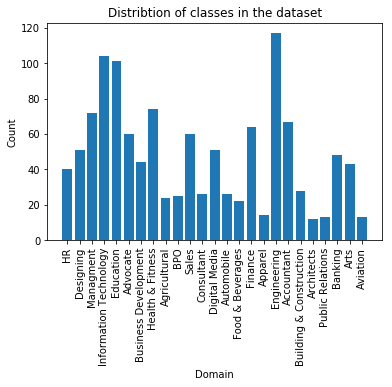

In [817]:
plt.bar(freq[0],freq[1])
plt.ylabel("Count")
plt.xlabel("Domain")
plt.title("Distribtion of classes in the dataset")
plt.xticks(rotation=90)
plt.show()

**We see that distribution of resumes amongst the various classes is non uniform. Resumes belonging to Engineering, Education and Information technology seem to dominate the dataset. This could be attributed to the following facts:**
* **These fields are high in demand worldwide.**
* **In addition to this, due to the excessive outflow of engineers from engineering colleges, there is an equally massive lending out of resumes in hope of a job in hand.**

## Frequency of words in the resumes.

In [818]:
sw = set(STOPWORDS)
eval_res = df["newer_res"].copy(deep=True)
sw_data=''
for i in eval_res:
    #token = nltk.word_tokentize()
        sw_data+=i
len(sw_data)

6518325

In [819]:
sw = STOPWORDS.union(set(string.punctuation))

In [820]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = sw,
                min_font_size = 13).generate(sw_data)

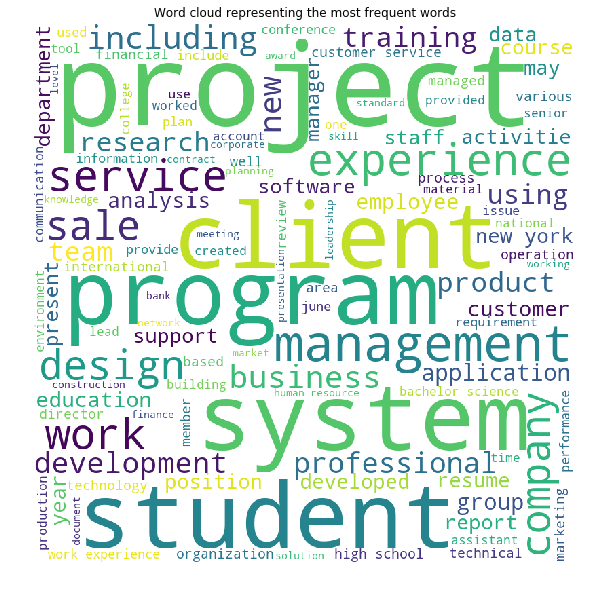

In [821]:
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Word cloud representing the most frequent words")
plt.axis("off") 
plt.tight_layout(pad = 0) 

**The word-cloud clearly sheds light on words like "project", "program", "system", "student", etc which are natuarally quite a lot likely to occur in resumes in general. Resumes are quite comprhensive around the "PROJECT" section and hence a resume is bound to have the word "project" appear quite a lot of times.** <BR>


## III. Find the frequency of adjectives used
**Since for the most part, one is trying to create a good impression of his/her resume in the recruiter's mind, use of good adjectives is really common, rather important and the frequency of adjectives could perhaps give us more insight into our dataset. **

In [822]:
length = df.shape

def pos_tag(s):
    return nltk.pos_tag(s)

adj_list={}
for i in range(length[0]):
    token = nltk.word_tokenize(eval_res[i])
    pos_token = pos_tag(token)
    for i,tag in pos_token:
        if tag in ["JJ","JJR","JJS"]:
            if i in adj_list:
                adj_list[i]+=1
            else:
                adj_list[i] = 1

In [823]:
df.shape

(1199, 4)

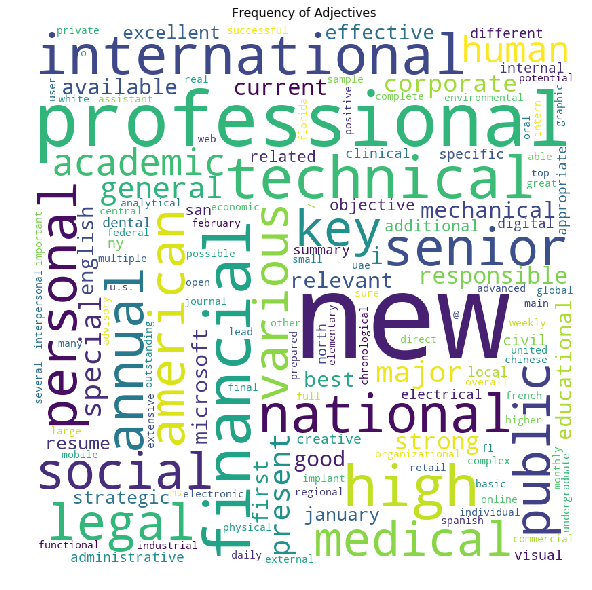

In [824]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = sw, 
                min_font_size = 15).generate_from_frequencies(adj_list)
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.title("Frequency of Adjectives")
plt.axis("off") 
plt.tight_layout(pad = 0) 

* Words like professional, responsible, academic, technical, social which are quiet prominent in the wordcloud, could have been mainly used in describing oneself.
* Words like Annual, various, international, medical, senior, legal, public etc couldve been used to exaplin about the past designations/jobs/income etc.

In [825]:
df.head()

,ID,Category,newer_res,Resume
0,1,HR,"john h. smith , p.h.r . 800-991-5187 | po box ...","b'John H. Smith, P.H.R.\n800-991-5187 | PO Box..."
1,2,HR,name surname address mobile no/email personal ...,b'Name Surname\nAddress\nMobile No/Email\nPERS...
2,3,HR,anthony brown hr assistant areas of expertise ...,b'Anthony Brown\nHR Assistant\nAREAS OF EXPERT...
3,4,HR,www.downloadmela.com satheesh email id : caree...,b'www.downloadmela.com\nSatheesh\nEMAIL ID:\nC...
4,5,HR,human resources director expert organizational...,"b""HUMAN RESOURCES DIRECTOR\n\xef\x82\xb7Expert..."


In [826]:
class_dict = {}

for i in df.itertuples():
    if i[2] not in class_dict:
        class_dict[i[2]] = " ".join(rem_punc(nltk.word_tokenize(i[3].strip(" "))))
    else:
        class_dict[i[2]]+= " " +  " ".join(rem_punc(nltk.word_tokenize(i[3].strip(" "))))


In [827]:
from collections import Counter
window = 2
ngram={}
p=0
for i in class_dict:
    ngram[i]={}
    token = nltk.word_tokenize(class_dict[i])
    for j in range(window,len(token)):
        val = tuple(token[j-2:j])
        if val not in ngram[i]:
            ngram[i][val] = 1
        else:
            ngram[i][val]+=1



**Top 10 most occuring bigrams under each class. **


In [828]:
{i:sorted(list(j.items()),key=lambda x:x[1],reverse=True)[:10] for (i,j) in ngram.items()}

{'Accountant': [(('account', 'manager'), 48),
  (('accountant', 'resume'), 36),
  (('accounts', 'payable'), 33),
  (('general', 'ledger'), 24),
  (('financial', 'statements'), 22),
  (('new', 'business'), 20),
  (('business', 'administration'), 19),
  (('income', 'tax'), 19),
  (('compagni', 'a.'), 19),
  (('dayjob', 'ltd'), 18)],
 'Advocate': [(('law', 'school'), 101),
  (('school', 'law'), 97),
  (('jackson', 'mississippi'), 88),
  (('bar', 'association'), 70),
  (('legal', 'education'), 64),
  (('new', 'york'), 54),
  (('state', 'bar'), 53),
  (('law', 'firms'), 48),
  (('north', 'carolina'), 46),
  (('law', 'schools'), 40)],
 'Agricultural': [(('key', 'responsibilities'), 26),
  (('resume', 'template'), 24),
  (('career', 'objective'), 15),
  (('professional', 'forte'), 15),
  (('professional', 'experience'), 15),
  (('educational', 'qualification'), 15),
  (('languages', 'known'), 15),
  (('known', 'fluent'), 15),
  (('significant', 'achievement'), 15),
  (('2000', 'till'), 14)],
